# Bagian 2: Design of Experiment 

Berisi seluruh proses dari *Data Gathering*, *Exploratory Data Analysis (EDA)*, hingga *Data Preprocessing* untuk dataset Telco Customer Churn.

## 1. Data Gathering

Dataset yang digunakan adalah **"Telco Customer Churn"** yang tersedia di Kaggle.

**Link Dataset:** [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Exploratory Data Analysis (EDA)

Tahap ini digunakan untuk melakukan eksplorasi agar bisa memahami karakteristik dan merangkum insight dari data.

### Statistik Dasar dan Informasi Data

In [2]:
# Melihat informasi umum dari dataframe (tipe data, non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Statistik deskriptif untuk fitur numerik
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Mengecek missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Persebaran Data dan Karakteristik Fitur

In [ ]:
# Melihat jumlah unik untuk setiap fitur 
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} unique values")

customerID: 7043 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


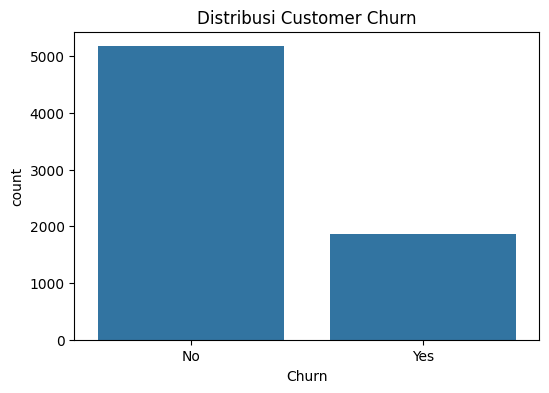

In [6]:
# Visualisasi distribusi target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Customer Churn')
plt.show()

## 3. Data Preprocessing

Tahap ini mempersiapkan data agar siap digunakan untuk modeling. Proses yang akan dilakukan antara lain:
1.  Membersihkan dan memperbaiki data (Correcting errors and inconsistencies).
2.  Melakukan encoding pada data kategorikal.
3.  Membagi data menjadi data latih dan data uji.
4.  Melakukan scaling pada fitur numerik.

### 3.1 Data Cleaning & Correction

Dari `df.info()`, kita melihat `TotalCharges` seharusnya numerik tapi terdeteksi sebagai 'object'. Ini mengindikasikan adanya nilai non-numerik.

In [7]:
# Mengubah TotalCharges menjadi numerik, error akan diubah menjadi NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mengecek kembali missing values yang mungkin muncul dari konversi
print('Missing values di TotalCharges setelah konversi:', df['TotalCharges'].isnull().sum())

Missing values di TotalCharges setelah konversi: 11


In [8]:
# Mengisi missing values di TotalCharges, misalnya dengan median
# Alasan: Median lebih tahan terhadap outlier dibandingkan mean.
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Verifikasi
print('Missing values di TotalCharges setelah diisi:', df['TotalCharges'].isnull().sum())

Missing values di TotalCharges setelah diisi: 0


C:\Users\ASUS-\AppData\Local\Temp\ipykernel_8056\599773762.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


In [9]:
# Menghapus kolom yang tidak relevan untuk prediksi, contohnya customerID
df.drop('customerID', axis=1, inplace=True)

### 3.2 Categorical Data Encoding

Model machine learning memerlukan input numerik, sehingga fitur kategorikal perlu diubah.

In [10]:
# Memisahkan fitur kategorikal untuk di-encode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Menghapus target variable dari list ini jika ada
categorical_cols.remove('Churn')

print("Kolom Kategorikal yang akan di-encode:", categorical_cols)

Kolom Kategorikal yang akan di-encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [11]:
# Menggunakan One-Hot Encoding untuk fitur kategorikal
# Alasan: Cocok untuk data nominal (tidak ada urutan) dan mencegah model berasumsi adanya urutan.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable (Churn) secara manual
df_encoded['Churn'] = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### 3.3 Pembagian Data (Train-Test Split)

Membagi data untuk melatih dan mengevaluasi model.

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 3.4 Feature Scaling

Menyamakan skala fitur numerik agar tidak ada fitur yang mendominasi.

In [13]:
from sklearn.preprocessing import StandardScaler

# Identifikasi kolom numerik (yang bukan hasil one-hot encoding)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,0.102371,-0.521976,-0.263289,True,False,False,False,True,False,...,False,True,False,True,False,False,False,False,True,False
3151,0,-0.711743,0.337478,-0.504814,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4860,0,-0.793155,-0.809013,-0.751213,True,True,True,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3867,0,-0.263980,0.284384,-0.173699,False,True,False,True,False,False,...,False,True,False,True,False,True,True,True,False,False
3810,0,-1.281624,-0.676279,-0.990851,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False


## 4. Modeling and Validation

### Pemilihan Metrik Evaluasi

Untuk masalah klasifikasi *customer churn* yang *imbalanced*, hanya menggunakan Akurasi saja tidak cukup karena mungkin akan bisa menyesatkan. Oleh karena itu, akan digunakan beberapa metrik:

* **Akurasi**
* **Precision**: Dari semua pelanggan yang kita prediksi akan *churn*, kita perlu melihat berapa persen yang sebenarnya benar. 
* **Recall**: Dari semua pelanggan yang sebenarnya *churn*, kita perlu tau berapa persen yang berhasil kita prediksi. Ini penting untuk kasus ini, karena kegagalan (false negative) berarti kehilangan pendapatan.
* **F1-Score**: Rata-rata harmonik dari Precision dan Recall. 

### 4.1 K-Nearest Neighbors (KNN)

In [14]:
from supervised_learning.knn import KNN 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

#### 4.1.1 Implementasi From Scratch

In [ ]:
# Kita coba dengan k=5 dan metrik Euclidean
# Alasan: k=5 adalah nilai umum yang sering digunakan, dan Euclidean adalah metrik jarak yang paling umum.
knn_scratch = KNN(k=5, distance_metric='euclidean')

# Training model
start_time = time.time()
knn_scratch.fit(X_train, y_train)

# Melakukan prediksi
y_pred_scratch = knn_scratch.predict(X_test)
end_time = time.time()

print(f"Waktu eksekusi prediksi (from scratch): {end_time - start_time:.4f} detik")

# Evaluasi model
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Akurasi (from scratch): {accuracy_scratch:.4f}")
print("\nClassification Report (from scratch):")
print(classification_report(y_test, y_pred_scratch))

Waktu eksekusi prediksi (from scratch): 75.7319 detik
Akurasi (from scratch): 0.7630

Classification Report (from scratch):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



#### 4.1.2 Implementasi Scikit-learn

In [ ]:
# n_neighbors sama dengan k, p=2 untuk metrik Euclidean
# Alasan: p=2 adalah parameter untuk metrik Euclidean dalam scikit-learn.
knn_sklearn = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

# Training model
start_time = time.time()
knn_sklearn.fit(X_train, y_train)

# Melakukan prediksi
y_pred_sklearn = knn_sklearn.predict(X_test)
end_time = time.time()

print(f"Waktu eksekusi prediksi (scikit-learn): {end_time - start_time:.4f} detik")

# Evaluasi model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Akurasi (scikit-learn): {accuracy_sklearn:.4f}")
print("\nClassification Report (scikit-learn):")
print(classification_report(y_test, y_pred_sklearn))

Waktu eksekusi prediksi (scikit-learn): 2.0760 detik
Akurasi (scikit-learn): 0.7630

Classification Report (scikit-learn):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1035
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.76      0.76      0.76      1409



### 4.2 Logistic Regression

In [18]:
from supervised_learning.logistic_regression import LogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

#### 4.2.1 Implementasi From Scratch

In [ ]:
log_reg_scratch = LogisticRegression(learning_rate=0.1, n_iters=1000)

# Training model
start_time = time.time()
log_reg_scratch.fit(X_train, y_train)

# Melakukan prediksi
y_pred_scratch_lr = log_reg_scratch.predict(X_test)
end_time = time.time()

print(f"Waktu eksekusi (from scratch): {end_time - start_time:.4f} detik")

# Evaluasi model
accuracy_scratch_lr = accuracy_score(y_test, y_pred_scratch_lr)
print(f"Akurasi (from scratch): {accuracy_scratch_lr:.4f}")
print("\nClassification Report (from scratch):")
print(classification_report(y_test, y_pred_scratch_lr))

Waktu eksekusi (from scratch): 0.1535 detik
Akurasi (from scratch): 0.8020

Classification Report (from scratch):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



#### 4.2.2 Implementasi Scikit-learn

In [ ]:
# solver='liblinear' C=1.0
# Alasan: 'liblinear' adalah pilihan yang baik untuk dataset kecil, dan C=1.0 adalah default.
log_reg_sklearn = SklearnLogisticRegression(solver='liblinear', C=1.0, random_state=42)

# Training model
start_time = time.time()
log_reg_sklearn.fit(X_train, y_train)

# Melakukan prediksi
y_pred_sklearn_lr = log_reg_sklearn.predict(X_test)
end_time = time.time()

print(f"Waktu eksekusi (scikit-learn): {end_time - start_time:.4f} detik")

# Evaluasi model
accuracy_sklearn_lr = accuracy_score(y_test, y_pred_sklearn_lr)
print(f"Akurasi (scikit-learn): {accuracy_sklearn_lr:.4f}")
print("\nClassification Report (scikit-learn):")
print(classification_report(y_test, y_pred_sklearn_lr))

Waktu eksekusi (scikit-learn): 0.0285 detik
Akurasi (scikit-learn): 0.8041

Classification Report (scikit-learn):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409



### 4.3 Gaussian Naive Bayes (GNB)

In [25]:
from supervised_learning.gaussian_naive_bayes import GaussianNaiveBayes
from sklearn.naive_bayes import GaussianNB

#### 4.3.1 Implementasi From Scratch

In [26]:
gnb_scratch = GaussianNaiveBayes()

# Training model
start_time = time.time()
gnb_scratch.fit(X_train, y_train)

# Melakukan prediksi
y_pred_scratch_gnb = gnb_scratch.predict(X_test)
end_time = time.time()

print(f"Waktu eksekusi (from scratch): {end_time - start_time:.4f} detik")

# Evaluasi model
accuracy_scratch_gnb = accuracy_score(y_test, y_pred_scratch_gnb)
print(f"Akurasi (from scratch): {accuracy_scratch_gnb:.4f}")
print("\nClassification Report (from scratch):")
print(classification_report(y_test, y_pred_scratch_gnb))

Waktu eksekusi (from scratch): 0.0665 detik
Akurasi (from scratch): 0.6558

Classification Report (from scratch):
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1035
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.67      1409



#### 4.3.2 Implementasi Scikit-learn

In [27]:
gnb_sklearn = GaussianNB()

# Training model
start_time = time.time()
gnb_sklearn.fit(X_train, y_train)

# Melakukan prediksi
y_pred_sklearn_gnb = gnb_sklearn.predict(X_test)
end_time = time.time()

print(f"Waktu eksekusi (scikit-learn): {end_time - start_time:.4f} detik")

# Evaluasi model
accuracy_sklearn_gnb = accuracy_score(y_test, y_pred_sklearn_gnb)
print(f"Akurasi (scikit-learn): {accuracy_sklearn_gnb:.4f}")
print("\nClassification Report (scikit-learn):")
print(classification_report(y_test, y_pred_sklearn_gnb))

Waktu eksekusi (scikit-learn): 0.0097 detik
Akurasi (scikit-learn): 0.6558

Classification Report (scikit-learn):
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      1035
           1       0.43      0.87      0.57       374

    accuracy                           0.66      1409
   macro avg       0.67      0.72      0.64      1409
weighted avg       0.79      0.66      0.67      1409



## 5. Unsupervised Learning

### 5.1 K-Means Clustering

Fitur yang akan digunakan adalah tenure, MonthlyCharges, dan TotalCharges yang sudah di scaling untuk clustering.

In [ ]:
from unsupervised_learning.kmeans import KMeans
from sklearn.cluster import KMeans as SklearnKMeans

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_numerical = X_train[numerical_cols]

#### 5.1.1 Implementasi From Scratch 

In [ ]:
kmeans_scratch = KMeans(n_clusters=3, max_iters=150, random_state=42)
kmeans_scratch.fit(X_train_numerical)
labels_scratch = kmeans_scratch.predict(X_train_numerical)

#### 5.1.2 Implementasi Scikit-learn

In [ ]:
kmeans_sklearn = SklearnKMeans(n_clusters=3, n_init='auto', max_iter=150, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X_train_numerical)

#### 5.1.3 Perbandingan Hasil Clustering

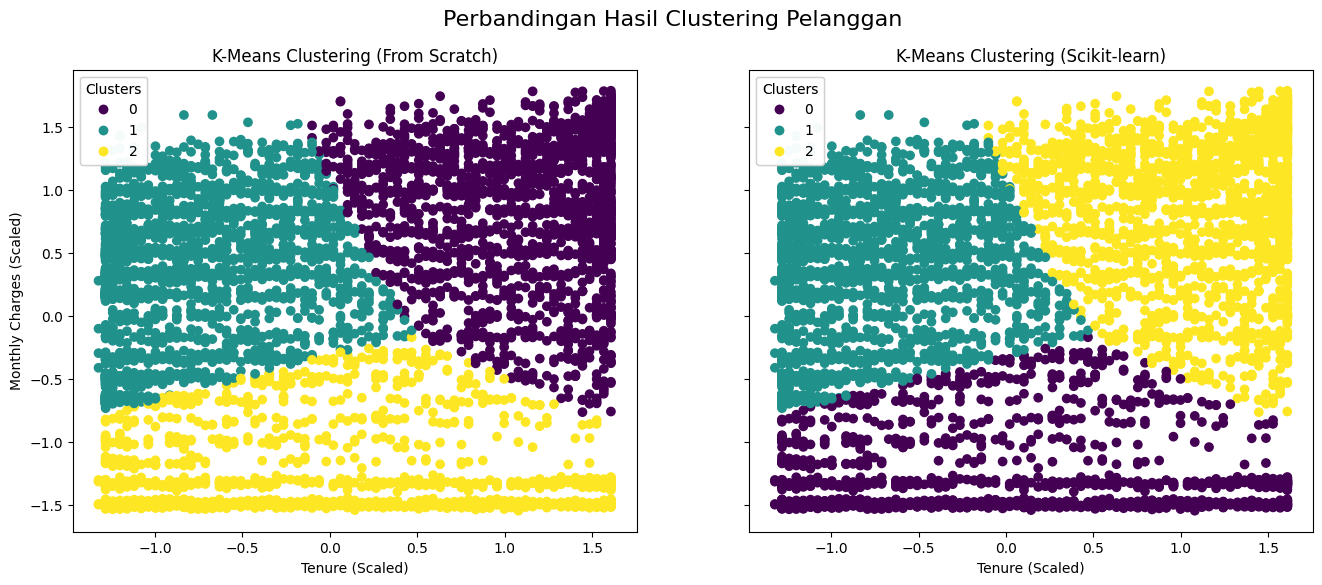

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot untuk model From Scratch
scatter_scratch = ax[0].scatter(X_train_numerical['tenure'], X_train_numerical['MonthlyCharges'], c=labels_scratch, cmap='viridis')
ax[0].set_title('K-Means Clustering (From Scratch)')
ax[0].set_xlabel('Tenure (Scaled)')
ax[0].set_ylabel('Monthly Charges (Scaled)')
legend1 = ax[0].legend(*scatter_scratch.legend_elements(), title="Clusters")
ax[0].add_artist(legend1)

# Plot untuk model Scikit-learn
scatter_sklearn = ax[1].scatter(X_train_numerical['tenure'], X_train_numerical['MonthlyCharges'], c=labels_sklearn, cmap='viridis')
ax[1].set_title('K-Means Clustering (Scikit-learn)')
ax[1].set_xlabel('Tenure (Scaled)')
# ax[1].set_ylabel('Monthly Charges (Scaled)') 

legend2 = ax[1].legend(*scatter_sklearn.legend_elements(), title="Clusters")
ax[1].add_artist(legend2)

plt.suptitle('Perbandingan Hasil Clustering Pelanggan', fontsize=16)
plt.show()